<a href="https://colab.research.google.com/github/Datanoninho/DataThon/blob/main/Dados_Fiocruz_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dados de internação e óbito de idosos**

---




### **Instalação e importação das bibliotecas necessárias**

In [ ]:
!pip install geopandas
!pip install plotly==4.14.0

     |████████████████████████████████| 972kB 8.6MB/s 
     |████████████████████████████████| 14.8MB 325kB/s 
     |████████████████████████████████| 6.5MB 34.9MB/s 
     |████████████████████████████████| 13.2MB 7.9MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Conhecendo o arquivo de informações do mapa do Brasil**

In [ ]:
# Criação do DataFrame info_UF - dados dos estados do Brasil 
info_UF = gpd.read_file('/content/drive/MyDrive/DataNoninho/bcim_2016_21_11_2018.gpkg', layer = 'lim_unidade_federacao_a')

In [ ]:
#Nome das colunas do dataset
info_UF.columns

Index(['nome', 'nomeabrev', 'geometriaaproximada', 'sigla', 'geocodigo',
       'id_produtor', 'id_elementoprodutor', 'cd_insumo_orgao',
       'nr_insumo_mes', 'nr_insumo_ano', 'tx_insumo_documento', 'geometry'],
      dtype='object')

In [ ]:
# Exibição das informações das 5 primeiras linhas
info_UF.head()

,nome,nomeabrev,geometriaaproximada,sigla,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry
0,Goiás,None,Sim,GO,52,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,Mato Grosso do Sul,None,Sim,MS,50,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,Paraná,None,Sim,PR,41,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,Minas Gerais,None,Sim,MG,31,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,Sergipe,None,Sim,SE,28,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."


Estado: Minas Gerais


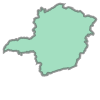

In [ ]:
#Exemplo de plot individual (estados)
print("Estado: " + info_UF.nome[3])
info_UF.geometry[3]

### **Dados compilados pela Fiocruz - Internações**
[LINK](*https*://www.saudeidoso.icict.fiocruz.br/novo2/ficha.php?p=1&cod=I26)

**Número de internações**

* *Interpretação:* Reflete a demanda hospitalar que, por sua vez, é condicionada pela oferta de serviços no SUS.
* *Método*: Número total de internações hospitalares de idosos pagas pelo SUS, por queda em pelo menos uma das causas.

In [ ]:
# Mapa coroplético com o número de internações em 2018 - por Unidade Federativa
internacoes_2018 = pd.read_excel('/content/drive/MyDrive/DataNoninho/Tab01_Internacoes_UF_2018.xls')
internacoes_2018.head()

,UF,2018
0,Rondônia,480
1,Acre,229
2,Amazonas,438
3,Roraima,117
4,Pará,1615


In [ ]:
internacoes_2018.columns

Index(['UF', 2018], dtype='object')

In [ ]:
internacoes_2018.sort_values(by=[2018], ascending=False)

,UF,2018
19,São Paulo,35752
16,Minas Gerais,18357
22,Rio Grande do Sul,9818
18,Rio de Janeiro,9178
20,Paraná,7858
15,Bahia,7097
21,Santa Catarina,6866
9,Ceará,4156
25,Goiás,3923
12,Pernambuco,3391


In [ ]:
# Renomeando a coluna com nome dos estados para UF, de modo a ter uma chave em comum com os datasets da Fiocruz
info_UF.rename({'nome': 'UF'}, axis = 1, inplace = True)

# Criação do dataframe internações, com o quantitativo de internações de pessoas 60+ de 2000 a 2019
mapa_internacoes_2018 = info_UF.merge(internacoes_2018, on ='UF', how = 'left')

# Exibição das informações das 5 primeiras linhas
mapa_internacoes_2018[['UF', 2018, 'geometry']].head()

,UF,2018,geometry
0,Goiás,3923,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,Mato Grosso do Sul,2211,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,Paraná,7858,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,Minas Gerais,18357,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,Sergipe,815,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."


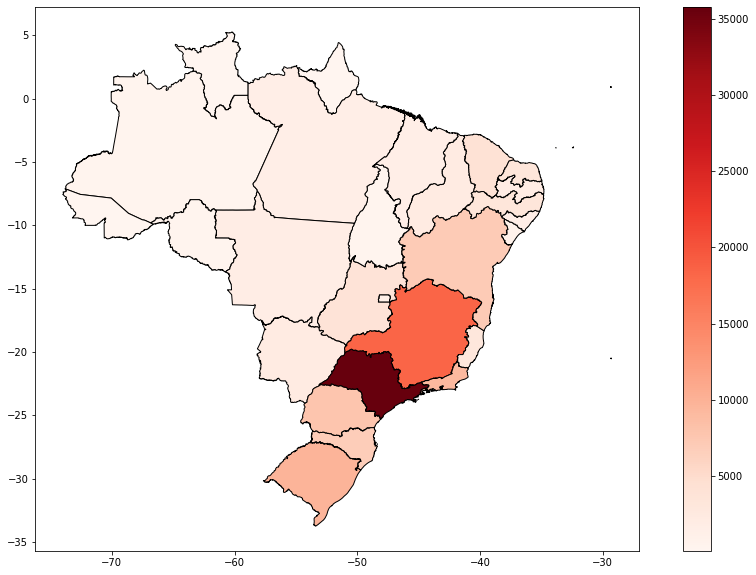

In [ ]:
%matplotlib inline
mapa_internacoes_2018.plot(column = 2018,
                            cmap = 'Reds',
                            figsize = (16,10),
                            legend = True,
                            edgecolor = 'black');

**Número de internações - Agrupado por Região**

In [ ]:
internacoes_total = pd.read_excel('/content/drive/MyDrive/DataNoninho/Tab02_Internacoes_Regiao.xls', sheet_name = 'Número')
internacoes_total.head(30)

,Ano,Norte,Nordeste,Sudeste,Sul,Centro Oeste
0,2000,2237,8546,29718,8974,3028
1,2001,2079,8487,30235,9394,3720
2,2002,1478,8552,32198,10878,8090
3,2003,1408,8524,34878,10003,5219
4,2004,1366,8505,36949,11043,4161
5,2005,1321,8705,37094,11421,4316
6,2006,1659,10098,38309,11300,4216
7,2007,2054,10498,38893,12057,3874
8,2008,1977,10157,35583,11601,3771
9,2009,1942,11554,38953,12932,4500


**Proporção de internações - Agrupado por região**

* *Interpretação:* Mede a participação relativa das quedas no total de internações de idosos financiadas pelo SUS. Reflete a demanda hospitalar que, por sua vez, é condicionada pela oferta de serviços no SUS.
* *Método:* (Número total de internações hospitalares de idosos pagas pelo SUS, por queda em pelo menos uma das causas / Número total de internações hospitalares de idosos pagas pelo SUS) x 100

In [ ]:
internacoes_prop = pd.read_excel('/content/drive/MyDrive/DataNoninho/Tab02_Internacoes_Regiao.xls', sheet_name = 'Proporcao')
internacoes_prop.head(30)

,Ano,Norte,Nordeste,Sudeste,Sul,Centro Oeste
0,2000,2.36,1.57,3.27,1.93,2.05
1,2001,2.13,1.53,3.36,2.02,2.38
2,2002,1.54,1.52,3.54,2.32,4.94
3,2003,1.44,1.52,3.69,2.22,3.15
4,2004,1.30,1.54,3.90,2.40,2.42
5,2005,1.18,1.64,3.93,2.55,2.52
6,2006,1.44,1.89,3.99,2.45,2.48
7,2007,1.77,1.93,4.03,2.56,2.37
8,2008,1.74,1.93,3.79,2.46,2.34
9,2009,1.55,2.02,3.98,2.63,2.69


**Taxa de internações - Agrupado por região**

* *Interpretação*: Estima o risco de internação por quedas na população idosa de 60 anos ou mais e dimensiona a sua magnitude como problema de saúde pública.
* *Método:* (Número total de internações hospitalares de idosos pagas pelo SUS, por queda em pelo menos uma das causas / População total de idosos) x 100000

In [ ]:
internacoes_taxa = pd.read_excel('/content/drive/MyDrive/DataNoninho/Tab02_Internacoes_Regiao.xls', sheet_name = 'Taxa')
internacoes_taxa.head(30)

,Ano,Norte,Nordeste,Sudeste,Sul,Centro Oeste
0,2000,311.16,209.13,434.77,382.91,386.73
1,2001,278.43,202.20,428.16,388.25,453.11
2,2002,190.26,198.44,441.97,435.75,940.90
3,2003,174.08,192.69,464.55,388.52,580.20
4,2004,162.16,187.12,477.23,415.48,442.18
5,2005,150.57,186.14,464.00,415.69,438.29
6,2006,181.44,209.53,463.47,397.34,408.93
7,2007,215.36,211.02,454.40,408.98,358.67
8,2008,198.31,197.26,400.12,378.45,332.56
9,2009,185.95,216.45,420.42,404.71,377.35


### **Dados compilados pela Fiocruz - Óbitos**
[LINK](https://www.saudeidoso.icict.fiocruz.br/novo2/ficha.php?p=1&cod=M29)

**Número de óbitos**

* *Interpretação:* Informa a ocorrência e distribuição dos óbitos por quedas em pelo menos uma das causas na população idosa na área geográfica referida. É um indicador útil para analisar a situação de saúde de uma população.
* *Método:* Número total de óbitos de idosos por queda em pelo menos uma das causas.

In [ ]:
# Mapa coroplético com o número de óbitos em 2018 - por Unidade Federativa
obitos_2018 = pd.read_excel('/content/drive/MyDrive/DataNoninho/Tab01_Obitos_UF_2018.xls')
obitos_2018.head()

,UF,2018
0,Rondônia,84
1,Acre,29
2,Amazonas,87
3,Roraima,22
4,Pará,221


In [ ]:
obitos_2018.sort_values(by=[2018], ascending=False)

,UF,2018
19,São Paulo,2932
16,Minas Gerais,1584
20,Paraná,1289
22,Rio Grande do Sul,1218
18,Rio de Janeiro,962
25,Goiás,677
12,Pernambuco,639
21,Santa Catarina,581
15,Bahia,539
9,Ceará,438


In [ ]:
# Criação do dataframe internações, com o quantitativo de internações de pessoas 60+ de 2000 a 2019
mapa_obitos_2018 = info_UF.merge(obitos_2018, on ='UF', how = 'left')

# Exibição das informações das 5 primeiras linhas
mapa_obitos_2018[['UF', 2018, 'geometry']].head()

,UF,2018,geometry
0,Goiás,677,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,Mato Grosso do Sul,197,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,Paraná,1289,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,Minas Gerais,1584,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,Sergipe,147,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."


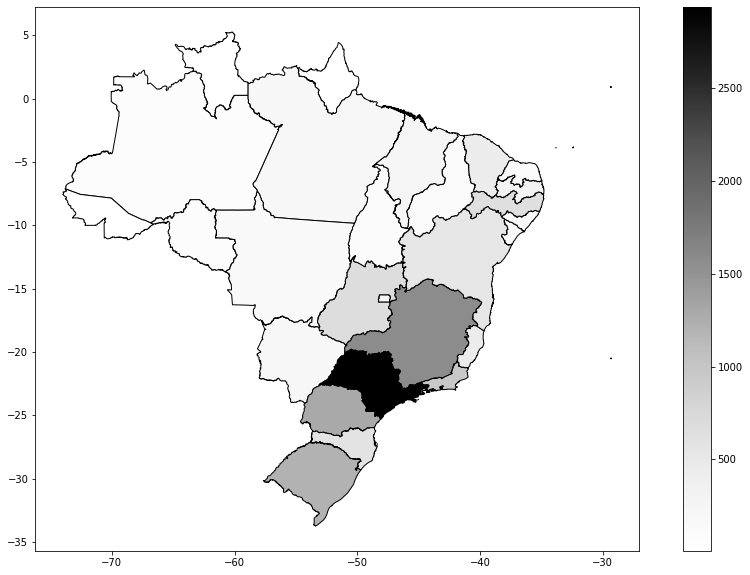

In [ ]:
mapa_obitos_2018.plot(column = 2018,
                            cmap = 'Greys',
                            figsize = (16,10),
                            legend = True,
                            edgecolor = 'black');

**Número de óbitos - Agrupado por região**

In [ ]:
obitos_total = pd.read_excel('/content/drive/MyDrive/DataNoninho/Tab02_Obitos_Regiao.xls', sheet_name = 'Número')
obitos_total.head(30)

,Ano,Norte,Nordeste,Sudeste,Sul,Centro Oeste
0,2000,86,476,1148,442,181
1,2001,113,534,1493,488,204
2,2002,73,544,1345,569,250
3,2003,116,665,1719,621,298
4,2004,106,756,2046,720,348
5,2005,143,939,1944,762,378
6,2006,163,1069,2658,825,384
7,2007,169,1036,2918,1047,440
8,2008,195,1021,3268,1057,530
9,2009,239,1044,3415,1054,640


**Proporção de óbitos - Agrupado por região**

* *Interpretação*: Mede a participação dos óbitos por queda entre os idosos de 60 anos ou mais, em relação ao total de óbitos de idosos de mesma faixa etária.
* *Método:* (Número total de óbitos de idosos por queda em pelo menos uma das causas / Número total de óbitos de idosos) x 100

In [ ]:
obitos_proporcao = pd.read_excel('/content/drive/MyDrive/DataNoninho/Tab02_Obitos_Regiao.xls', sheet_name = 'Proporcao')
obitos_proporcao.head(30)

# Observação: o NaN não é erro ou dados faltante, estava assim na base de dados

,Ano,Norte,Nordeste,Sudeste,Sul,Centro Oeste
0,2000,NaN,NaN,0.44,0.48,0.69
1,2001,NaN,NaN,0.56,0.53,0.75
2,2002,NaN,NaN,0.49,0.60,0.86
3,2003,NaN,NaN,0.61,0.63,0.99
4,2004,NaN,NaN,0.70,0.71,1.07
5,2005,NaN,NaN,0.68,0.76,1.18
6,2006,0.63,0.73,0.88,0.80,1.16
7,2007,0.63,0.68,0.95,0.96,1.27
8,2008,0.67,0.64,1.03,0.98,1.45
9,2009,0.79,0.63,1.05,0.93,1.71


**Taxa de óbitos - Agrupado por região**

* *Interpretação:* Estima o risco de morte por queda na população idosa de 60 anos ou mais e dimensiona a sua magnitude como problema de saúde pública.
* *Método:* (Número total de óbitos de idosos por queda em pelo menos uma das causas / População total de idosos) x 100000

In [ ]:
obitos_taxa = pd.read_excel('/content/drive/MyDrive/DataNoninho/Tab02_Obitos_Regiao.xls', sheet_name = 'Taxa')
obitos_taxa.head(30)

# Observação: o NaN não é erro ou dados faltante, estava assim na base de dados

,Ano,Norte,Nordeste,Sudeste,Sul,Centro Oeste
0,2000,NaN,NaN,16.80,18.86,23.12
1,2001,NaN,NaN,21.14,20.17,24.85
2,2002,NaN,NaN,18.46,22.79,29.08
3,2003,NaN,NaN,22.90,24.12,33.13
4,2004,NaN,NaN,26.43,27.09,36.98
5,2005,NaN,NaN,24.32,27.73,38.39
6,2006,17.83,22.18,32.16,29.01,37.25
7,2007,17.72,20.82,34.09,35.51,40.74
8,2008,19.56,19.83,36.75,34.48,46.74
9,2009,22.88,19.56,36.86,32.99,53.67


In [ ]:
projecao = pd.read_excel('/content/projecoes3.xlsx')
projecao

,Ano,População Total,População de Idosos,Porcentagem
0,2010,194890682,20867925,0.107075
1,2015,203475683,25038352,0.123053
2,2020,211755692,30197077,0.142603
3,2025,219029093,36084074,0.164746
4,2030,224868462,42122847,0.187322
5,2035,229173685,47967557,0.209307
6,2040,231919922,54400949,0.234568
7,2045,233149625,60876158,0.261103
8,2050,232933276,66265645,0.284483
9,2055,231300323,70285779,0.303872
